In [ ]:
from sklearn.datasets import make_regression
reg = make_regression(n_samples=100, n_features=4, n_targets=1)
type(reg)

tuple

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.DataFrame(np.concatenate((reg[0],reg[1].reshape(-1,1)),axis=1),columns=['one','two','three','four','five'])

In [ ]:
data.head()

,one,two,three,four,five
0,0.657945,-1.559736,0.542535,0.264732,-58.897519
1,0.996459,-0.352961,1.609094,-2.222056,-59.889614
2,-1.455832,1.167672,-0.703170,-0.830816,-62.564310
3,-1.202484,1.621342,-0.772663,0.344601,64.249469
4,2.180735,-0.326232,0.813110,2.491043,287.180070


In [ ]:
x=data.drop('five',axis=1)
y=data['five']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Make a model
model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(len(x_train.loc[55,:].values),)))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.2),loss=tf.keras.losses.mae,metrics=['mae'])

In [ ]:
import numpy as np
data=pd.DataFrame(np.concatenate((reg[0],reg[1].reshape(-1,1)),axis=1),columns=['one','two','three','four','five'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2769 (10.82 KB)
Trainable params: 2769 (10.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=25)

Epoch 1/25
3/3 [==============================] - 1s 7ms/step - loss: 73.2648 - mae: 73.2648
Epoch 2/25
3/3 [==============================] - 0s 5ms/step - loss: 65.1974 - mae: 65.1974
Epoch 3/25
3/3 [==============================] - 0s 6ms/step - loss: 53.5308 - mae: 53.5308
Epoch 4/25
3/3 [==============================] - 0s 6ms/step - loss: 35.1919 - mae: 35.1919
Epoch 5/25
3/3 [==============================] - 0s 4ms/step - loss: 23.4011 - mae: 23.4011
Epoch 6/25
3/3 [==============================] - 0s 4ms/step - loss: 19.9818 - mae: 19.9818
Epoch 7/25
3/3 [==============================] - 0s 4ms/step - loss: 26.1512 - mae: 26.1512
Epoch 8/25
3/3 [==============================] - 0s 4ms/step - loss: 18.6583 - mae: 18.6583
Epoch 9/25
3/3 [==============================] - 0s 5ms/step - loss: 21.1048 - mae: 21.1048
Epoch 10/25
3/3 [==============================] - 0s 4ms/step - loss: 15.4379 - mae: 15.4379
Epoch 11/25
3/3 [==============================] - 0s 4ms/step - loss

In [ ]:
#The second duty:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [ ]:
x_train=pd.DataFrame(x_train,columns=[f'F{i}' for i in range(1,len(x_train[0])+1)])

In [ ]:
x_test=pd.DataFrame(x_test,columns=[f'F{i}' for i in range(1,len(x_test[0])+1)])

In [ ]:
x_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05
1,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
2,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
3,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
4,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44


In [ ]:
model_3=tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(28,activation='relu'))
model_3.add(tf.keras.layers.Dense(64,activation='relu'))
model_3.add(tf.keras.layers.Dense(128,activation='relu'))
model_3.add(tf.keras.layers.Dense(1))

model_3.build(input_shape=(None,len(x_train.loc[0,:])))

In [ ]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mae,metrics=['mae'])

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 28)                392       
                                                                 
 dense_10 (Dense)            (None, 64)                1856      
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10697 (41.79 KB)
Trainable params: 10697 (41.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_train=pd.Series(y_train)
y_test=pd.Series(y_test)

In [ ]:
history=model_3.fit(x_train,y_train,epochs=170)

Epoch 1/170
13/13 [==============================] - 2s 2ms/step - loss: 8.2566 - mae: 8.2566
Epoch 2/170
13/13 [==============================] - 0s 2ms/step - loss: 5.6512 - mae: 5.6512
Epoch 3/170
13/13 [==============================] - 0s 2ms/step - loss: 5.0627 - mae: 5.0627
Epoch 4/170
13/13 [==============================] - 0s 2ms/step - loss: 5.0208 - mae: 5.0208
Epoch 5/170
13/13 [==============================] - 0s 3ms/step - loss: 5.2665 - mae: 5.2665
Epoch 6/170
13/13 [==============================] - 0s 2ms/step - loss: 4.8103 - mae: 4.8103
Epoch 7/170
13/13 [==============================] - 0s 3ms/step - loss: 4.7323 - mae: 4.7323
Epoch 8/170
13/13 [==============================] - 0s 3ms/step - loss: 4.7423 - mae: 4.7423
Epoch 9/170
13/13 [==============================] - 0s 2ms/step - loss: 4.6779 - mae: 4.6779
Epoch 10/170
13/13 [==============================] - 0s 2ms/step - loss: 4.6968 - mae: 4.6968
Epoch 11/170
13/13 [==============================] - 0s 2m

In [ ]:
model_3.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.4134 - mae: 3.4134


[3.4133689403533936, 3.4133689403533936]

In [ ]:
import matplotlib.pyplot as plt

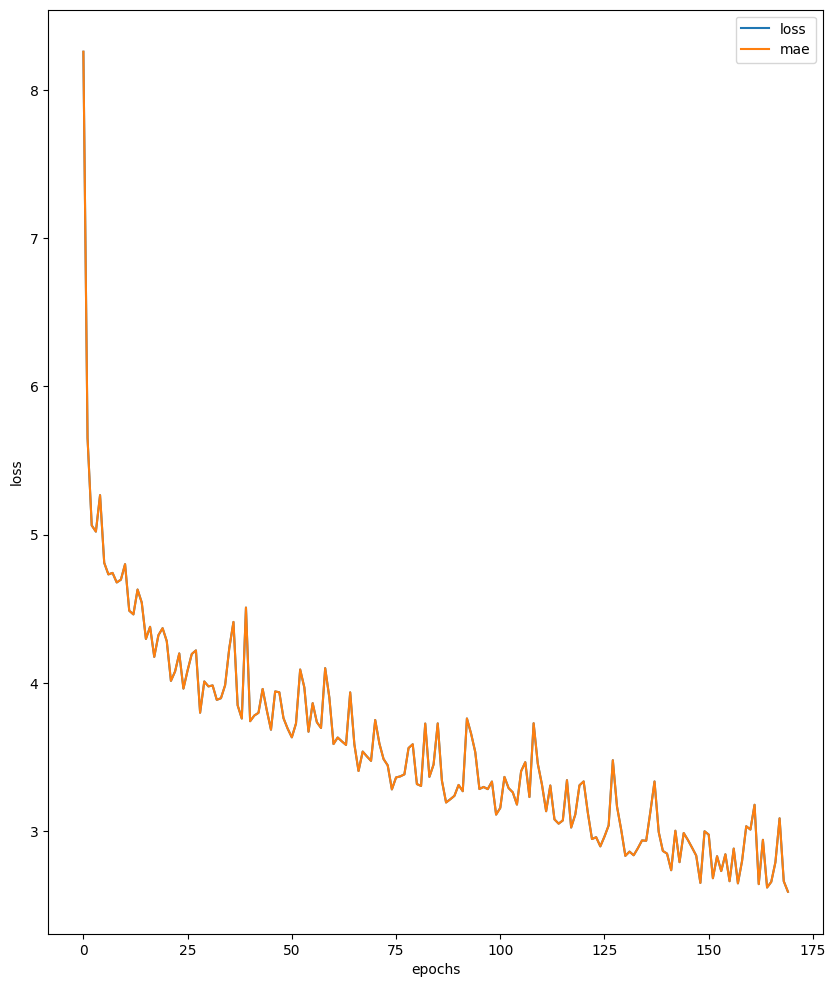

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,12))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()